# Color Filter

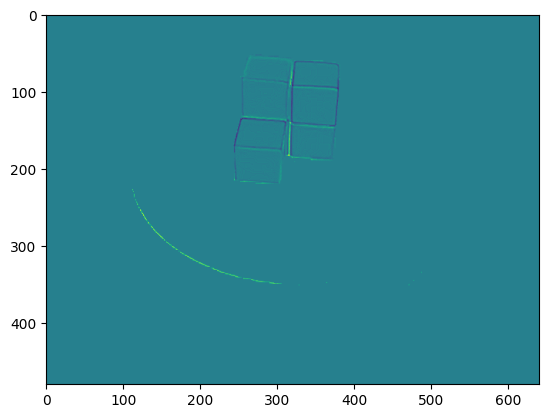

True

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt # für RaspberryPi Code entfernen

img = cv2.imread('Bild.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

lower_red = np.array([0, 100, 110])
upper_red = np.array([345, 255, 255])

lower_blue = np.array([90, 95, 50])
upper_blue = np.array([130, 255, 255])

lower_yellow = np.array([25, 100, 100])
upper_yellow = np.array([30, 255, 255])

red_mask = cv2.inRange(hsv, lower_red, upper_red)
blue_mask = cv2.inRange(hsv, lower_blue, upper_blue)
yellow_mask = cv2.inRange(hsv, lower_yellow, upper_yellow)

final_mask = red_mask + blue_mask + yellow_mask

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
smoothed = cv2.GaussianBlur(gray, (5, 5), 0)
sharpened = cv2.Laplacian(smoothed, cv2.CV_64F)

filter = cv2.bitwise_and(sharpened, sharpened, mask = final_mask)


plt.imshow(filter) # für RaspberryPi Code entfernen
plt.show() # für RaspberryPi Code entfernen

result = cv2.convertScaleAbs(filter)
bilateral = cv2.bilateralFilter(result, 15,100,100) #anpassen
cv2.imwrite("Cube1.png", bilateral)

# Depth Map

In [ ]:
import cv2
import torch
import matplotlib.pyplot as plt # für RaspberryPi Code entfernen
from matplotlib.colors import LinearSegmentedColormap

filename = ("Cube1.png")

model_type = "DPT_Large"
midas = torch.hub.load("intel-isl/MiDas", model_type)

midas_transforms = torch.hub.load("intel-isl/MiDas", "transforms")
if model_type == "DPT_Large" or model_type == "DPT_Hybrid":
    transform = midas_transforms.dpt_transform

device = torch.device("cpu")
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)


input_batch = transform(img).to(device)

with torch.no_grad():
    prediction = midas(input_batch)

    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()
    
output = prediction.cpu().numpy()

plt.imshow(output, cmap='gray') # für RaspberryPi Code entfernen
plt.axis('off') # für RaspberryPi Code entfernen
plt.show() # für RaspberryPi Code entfernen

cv2.imwrite("DepthMap.png", output)

# Image Segmentation

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt # für RaspberryPi Code entfernen

depth_map = cv2.imread("DepthMap.png", cv2.IMREAD_GRAYSCALE)
img = cv2.imread("Cube1.png")

threshold_distance = 12

mask = depth_map < threshold_distance

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_rgb[mask] = [0,0, 0]

gray_image = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)


threshold = 10
mask_black = cv2.threshold(gray_image, threshold, 255, cv2.THRESH_BINARY)[1]
mask_white = cv2.bitwise_not(mask_black)

img[mask_white == 255] = [255, 255, 255]
cv2.imwrite("Result11.png", img)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img) # für RaspberryPi Code entfernen
plt.show() # für RaspberryPi Code entfernen